# Import packages

In [112]:
import matplotlib.pyplot as plt
from utils import create_dataset,model_plot,history_plot, read_data, plot_data, prepare_train_test_data
import numpy as np
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

In [113]:
clean_df,data=read_data('portfolio_data.csv',debug=True)

        Date        AMZN        DPZ         BTC       NFLX
0   5/1/2013  248.229996  51.190983  106.250000  30.415714
1   5/2/2013  252.550003  51.987320   98.099998  30.641428
2   5/3/2013  258.049988  52.446388  112.900002  30.492857
3   5/6/2013  255.720001  53.205257  109.599998  30.098572
4   5/7/2013  257.730011  54.151505  113.199997  29.464285
5   5/8/2013  258.679993  54.385727  112.800003  29.801428
6   5/9/2013  260.160004  54.020340  117.699997  30.915714
7  5/10/2013  263.630005  54.357620  115.639999  31.098572
8  5/13/2013  264.510010  54.573097  111.400002  32.768570
9  5/14/2013  268.329987  55.275757  114.220001  33.424286
----------------------------------------------------
        Date        AMZN
0 2013-05-01  248.229996
1 2013-05-02  252.550003
2 2013-05-03  258.049988
3 2013-05-06  255.720001
4 2013-05-07  257.730011
5 2013-05-08  258.679993
6 2013-05-09  260.160004
7 2013-05-10  263.630005
8 2013-05-13  264.510010
9 2013-05-14  268.329987


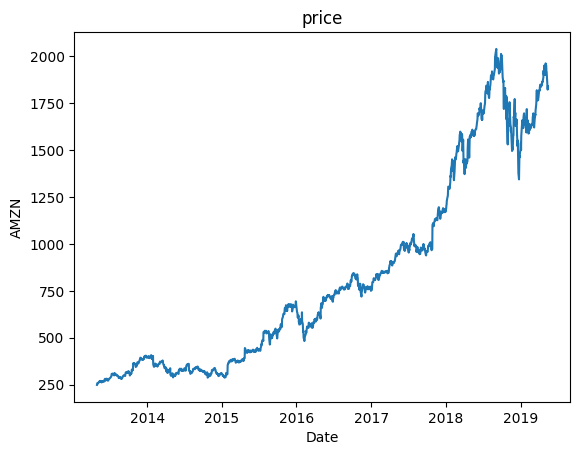

In [114]:
plot_data(clean_df["AMZN"], title="price", x_label="Date", y_label="AMZN")

In [115]:
def prepare_train_test_data(data, time_step_in, time_step_out, test_size=0.2):
    X, Y = create_dataset(data, time_step_in, time_step_out)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size)

    # Separate scalers for X and Y
    scaler_X = MinMaxScaler(feature_range=(0,1))
    scaler_Y = MinMaxScaler(feature_range=(0,1))
    x_train = scaler_X.fit_transform(X_train)
    y_train = scaler_Y.fit_transform(Y_train)
    x_test = scaler_X.transform(X_test)
    y_test = scaler_Y.transform(Y_test)

    print(f'x_train shape: {x_train.shape}, y_train shape: {y_train.shape}, x_test shape: {x_test.shape}, y_test shape: {y_test.shape}')
    
    return x_train, x_test, y_train, y_test, scaler_X, scaler_Y
x_train, x_test, y_train, y_test, scaler_X, scaler_Y = prepare_train_test_data(data, time_step_in=20, time_step_out=1, test_size=0.2)

x_train shape: (1199, 20), y_train shape: (1199, 1), x_test shape: (300, 20), y_test shape: (300, 1)


In [116]:
dense_model_1=Sequential()
dense_model_1.add(Dense(512,input_shape=(20,),activation="relu"))
dense_model_1.add(Dense(256,activation="relu"))
dense_model_1.add(Dense(128,activation="relu"))
dense_model_1.add(Dense(256,activation="relu"))
dense_model_1.add(Dense(128,activation="relu"))
dense_model_1.add(Dense(1))
dense_model_1.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.0001), metrics=['mean_absolute_error'])
dense_model_1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 512)            │        10,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 241,025 (941.50 KB)

 Trainable params: 241,025 (941.50 KB)

 Non-trainable params: 0 (0.00 B)

In [117]:
history_1= dense_model_1.fit(
    x_train,y_train,
    epochs=100,              
    validation_data=(x_test,y_test),  
    verbose=1  
)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1776 - mean_absolute_error: 0.1776 - val_loss: 0.0152 - val_mean_absolute_error: 0.0152
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 - mean_absolute_error: 0.0151 - val_loss: 0.0122 - val_mean_absolute_error: 0.0122
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0126 - mean_absolute_error: 0.0126 - val_loss: 0.0101 - val_mean_absolute_error: 0.0101
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0102 - mean_absolute_error: 0.0102 - val_loss: 0.0096 - val_mean_absolute_error: 0.0096
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0107 - mean_absolute_error: 0.0107 - val_loss: 0.0085 - val_mean_absolute_error: 0.0085
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0095 - mean_absolute_error: 0.0095 - val_loss: 0.0104 - val_mean_absolute_error: 0.0104
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0091 - mean_absolute_error: 0.0091 - val_loss

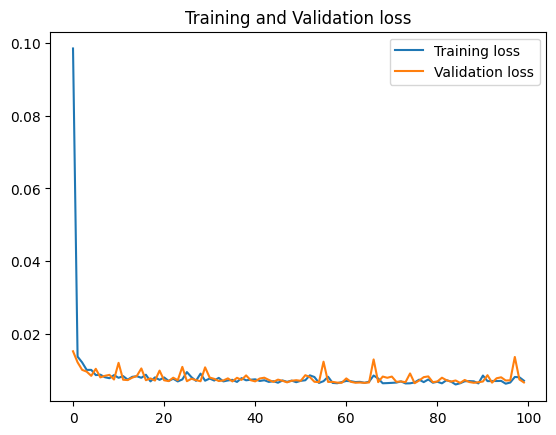

In [118]:
history_plot(history_1)

In [120]:
result =dense_model_1.evaluate(x_test, y_test)
y_pred = dense_model_1.predict(x_test) 
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = 1 - MAPE
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print("Test Accuracy:", Accuracy)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0074 - mean_absolute_error: 0.0074 
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step
Test Loss: [0.006655239034444094, 0.006655239034444094]
Test MAPE: 0.047831479995151444
Test Accuracy: 0.9521685200048485


In [123]:
all_predictions = []
input_window = x_test[-1]  

for i in range(1, 31): 
    print(f'Step {i} ==> Input Window: {input_window}')
    
    y_temp = dense_model_1.predict(input_window.reshape(1, -1))
    print(f"Prediction Output (y_temp): {y_temp}")
    all_predictions.extend(y_temp[0])  # Add all predicted values from y_temp to the list
    input_window = np.roll(input_window, -1, axis=0)
    input_window[-1] = y_temp[0][0] 

Step 1 ==> Input Window: [0.78661002 0.77704031 0.77593772 0.79382101 0.80730507 0.80510214
 0.79174414 0.76737145 0.76447462 0.79249846 0.79389346 0.80385542
 0.80127349 0.81597731 0.83273428 0.84381555 0.86373941 0.87610883
 0.84512791 0.85047746]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Prediction Output (y_temp): [[0.85073453]]
Step 2 ==> Input Window: [0.77704031 0.77593772 0.79382101 0.80730507 0.80510214 0.79174414
 0.76737145 0.76447462 0.79249846 0.79389346 0.80385542 0.80127349
 0.81597731 0.83273428 0.84381555 0.86373941 0.87610883 0.84512791
 0.85047746 0.85073453]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
Prediction Output (y_temp): [[0.8551855]]
Step 3 ==> Input Window: [0.77593772 0.79382101 0.80730507 0.80510214 0.79174414 0.76737145
 0.76447462 0.79249846 0.79389346 0.80385542 0.80127349 0.81597731
 0.83273428 0.84381555 0.86373941 0.87610883 0.84512791 0.85047746
 0.85073453 0.85518551]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Prediction Output (y_temp): [[0.8549958]]
Step 4 ==

In [124]:
num_samples = len(all_predictions)
all_predictions_array = np.array(all_predictions) 
all_predictions_reshaped = all_predictions_array.reshape(num_samples, 1)  
y_next_30 = scaler_Y.inverse_transform(all_predictions_reshaped)
y_next_30 = np.round(y_next_30)

In [125]:
x_test=scaler_X.inverse_transform(x_test)
x_train=scaler_X.inverse_transform(x_train)
x_test[-1]

array([1636.400024, 1641.089966, 1639.829956, 1671.72998 , 1696.170044,
       1692.430054, 1668.949951, 1625.949951, 1620.800049, 1670.619995,
       1673.099976, 1690.810059, 1686.219971, 1712.359985, 1742.150024,
       1761.849976, 1797.27002 , 1819.26001 , 1764.77002 , 1774.26001 ])

## Plot the result

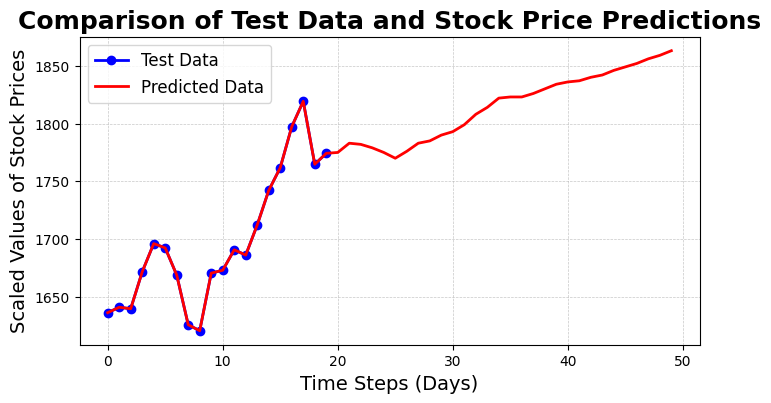

In [128]:
plt.figure(figsize=(8, 4))
plt.plot(x_test[-1], label='Test Data', marker='o', color='blue', linestyle='-', linewidth=2, markersize=6)
plt.plot(np.hstack([x_test[-1], y_next_30.reshape(-1)]), label='Predicted Data', color='red', linewidth=2, markersize=8)
plt.title('Comparison of Test Data and Stock Price Predictions', fontsize=18, fontweight='bold')
plt.xlabel('Time Steps (Days)', fontsize=14)
plt.ylabel('Scaled Values of Stock Prices', fontsize=14)
plt.legend(fontsize=12, loc='upper left')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()

In [129]:
last_date = clean_df.index[-1]
last_20_days=np.round(x_test[-1])
print(f" the last 20 days till {last_date}: {last_20_days}\npredicted 30 days: {y_next_30.flatten().tolist()}")

 the last 20 days till 2019-05-14 00:00:00: [1636. 1641. 1640. 1672. 1696. 1692. 1669. 1626. 1621. 1671. 1673. 1691.
 1686. 1712. 1742. 1762. 1797. 1819. 1765. 1774.]
predicted 30 days: [1775.0, 1783.0, 1782.0, 1779.0, 1775.0, 1770.0, 1776.0, 1783.0, 1785.0, 1790.0, 1793.0, 1799.0, 1808.0, 1814.0, 1822.0, 1823.0, 1823.0, 1826.0, 1830.0, 1834.0, 1836.0, 1837.0, 1840.0, 1842.0, 1846.0, 1849.0, 1852.0, 1856.0, 1859.0, 1863.0]
